## Closures

Thus far, we've encountered **functionals**, or functions that take other functions as arguments and **recursion**, a technique where a function calls itself. Now we're going to discuss **closures**, or a function that returns another function. Closures are one of the most powerful and useful functional programming techniques we can use with R.

Let's look at an example:

In [1]:
toPower <- function(n) {
    function(x) {
        x^n
    }
}

Okay... so what does this do? Behold:

In [2]:
# Let's make some functions:
squared <- toPower(2)
cubed <- toPower(3)

In [3]:
squared(3)

[1] 9

In [4]:
cubed(3)

[1] 27

There are some important things to note here. Remember how in the function intro we discussed how functions have their own little environments? The function that is returned by a closure has access to its parent's environment. This allows us to do all kinds of neat things, the most obvious of which is to create little function factories. Now's a good time to remember functionals and `apply`... we can, with very very little typing, do a lot of work:

In [15]:
powers <- 1:10
toExp <- sample(100, 10, FALSE)

toExp
powerFuncs <- lapply(powers, toPower)
sapply(powerFuncs, function(x) x(toExp))

[1] 21 66 19 20 30 29 91 38  3 80

21,441,9261,194481,4084101,85766121,1.801089e+09,3.782286e+10,7.942800e+11,1.667988e+13
66,4356,287496,18974736,1252332576,82653950016,5.455161e+12,3.600406e+14,2.376268e+16,1.568337e+18
19,361,6859,130321,2476099,47045881,8.938717e+08,1.698356e+10,3.226877e+11,6.131066e+12
20,400,8000,160000,3200000,64000000,1.280000e+09,2.560000e+10,5.120000e+11,1.024000e+13
30,900,27000,810000,24300000,729000000,2.187000e+10,6.561000e+11,1.968300e+13,5.904900e+14
29,841,24389,707281,20511149,594823321,1.724988e+10,5.002464e+11,1.450715e+13,4.207072e+14
91,8281,753571,68574961,6240321451,567869252041,5.167610e+13,4.702525e+15,4.279298e+17,3.894161e+19
38,1444,54872,2085136,79235168,3010936384,1.144156e+11,4.347792e+12,1.652161e+14,6.278212e+15
3,9,27,81,243,729,2.187000e+03,6.561000e+03,1.968300e+04,5.904900e+04
80,6400,512000,40960000,3276800000,262144000000,2.097152e+13,1.677722e+15,1.342177e+17,1.073742e+19


## Currying

Our `toPower` function is an example of **currying.** Currying means that we take a function that accepts multiple arguments and break it into a series of closures with each functional step only accepting one argument. This allows us to partially apply each function's arguments. This gives us a lot of flexibility and opens up a lot of the factory behavior we demonstrated above. Let's try it:

### Exercise: Gravitational Forces

The gravitational force between two objects can be expressed by the following equation:

$$ 
F = G \frac{m_1 m_2}{r^2} 
$$


Where:
- G = gravitational constant (6.674E-11)
- m1, m2 = the masses of the two objects
- r = distance between the two objects


Curry this function and then use neat functional tricks (like `lapply`?) to evaluate the following scenarios:

I weigh approximately 75 kilos. Calculate the gravitational force between me and:

1. A bowling ball (7.26 kilos)
2. A mallard duck (1.36 kilos)
3. A blue whale (136077.7 kilos)
4. Titan (1.3452e23 kilos)

at the following distances:

1. 3 meters
2. 5 kilometers
3. 9.461e12 kilometers

## Closures and Interactive R

R is a weird language for many reasons, but one of the most unique aspects of it is it is designed to be used interactively. While **REPLs** (read, evaluate, print, loop) exist for other languages, most are only used for quick checks, not for real work. Compliled languages, by their very nature, don't even have interactive sessions.

R is designed to be useful when used interactively - indeed, this is one reason why EDA is so easy with R. With effective use of Closures, we can create tools that make using R interactively more powerful. A quick example:

In [60]:
# For reference:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [54]:
library(ggplot2)

dot_plotter <- function(ind, dep) {
    function(colorvar) {
        mtcars[colorvar] <- as.factor(mtcars[[colorvar]])
        g <- ggplot(data = mtcars, aes_string(x = ind, y = dep, color = colorvar))
        g + geom_point(size = 2)
    }
}

In [55]:
mpg_by_weight <- dot_plotter("wt", "mpg")

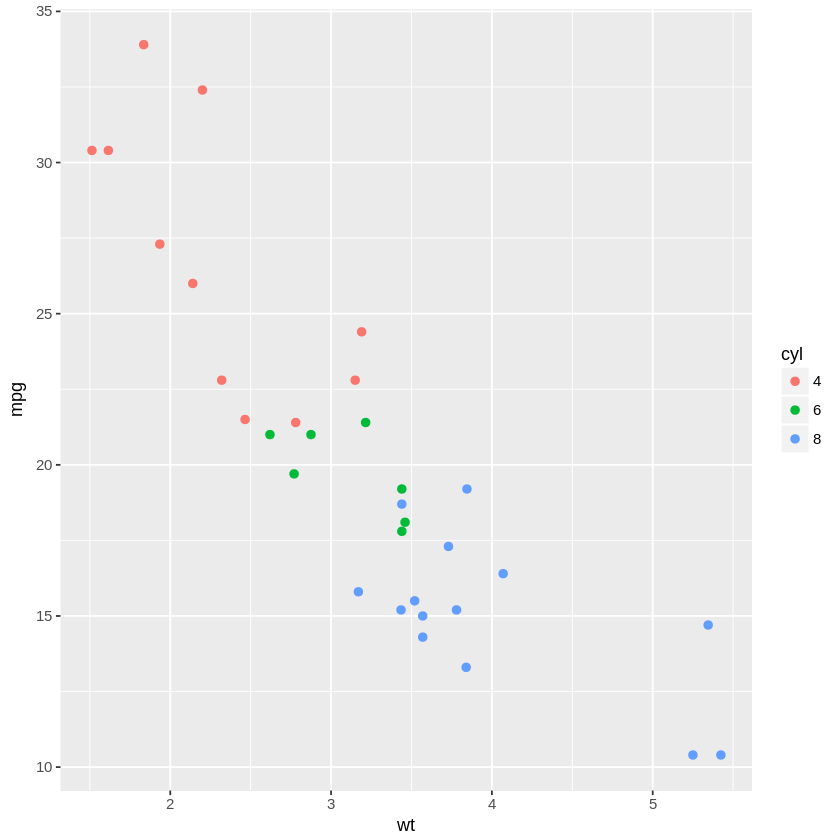

In [58]:
mpg_by_weight("cyl")

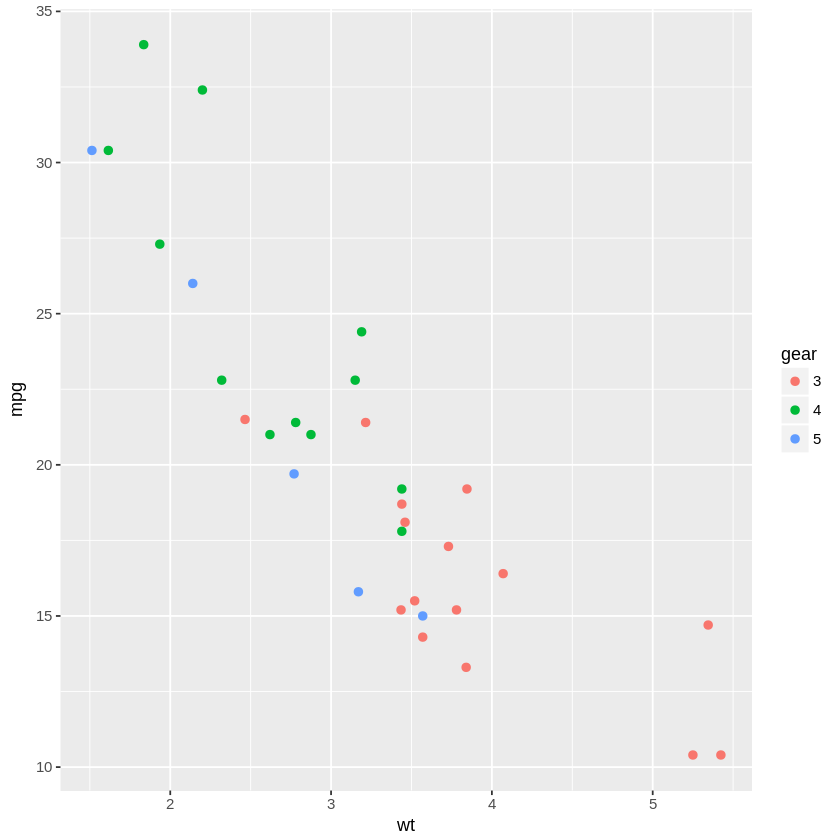

In [61]:
mpg_by_weight("gear")

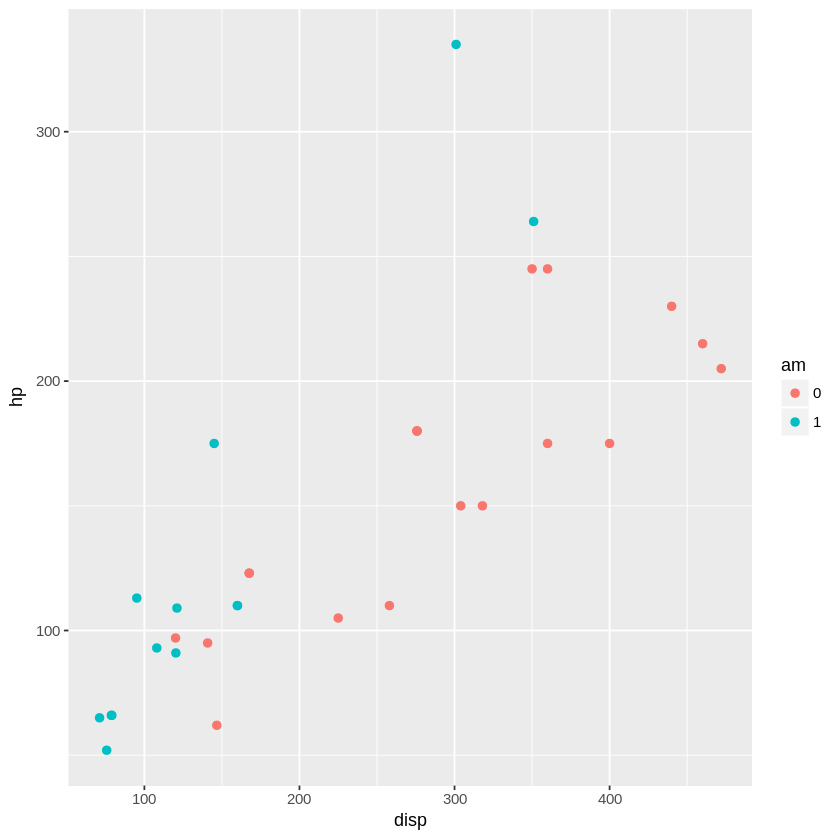

In [62]:
# or...

hp_by_disp <- dot_plotter("disp", "hp")
hp_by_disp("am")

How might we make this better? Go ahead and experiment!